2024-05-16 11:01:07.396 | INFO     | alchemlyb.workflows.base:__init__:50 - Alchemlyb Version: f2.1.0
2024-05-16 11:01:07.399 | INFO     | alchemlyb.workflows.base:__init__:51 - Set Temperature to 303.2 K.
2024-05-16 11:01:07.400 | INFO     | alchemlyb.workflows.base:__init__:53 - Set Software to GROMACS.
2024-05-16 11:01:07.402 | INFO     | alchemlyb.workflows.abfe:__init__:83 - Initialise Alchemlyb ABFE Workflow
2024-05-16 11:01:07.402 | INFO     | alchemlyb.workflows.abfe:update_units:307 - Set unit to kT.
2024-05-16 11:01:07.403 | INFO     | alchemlyb.workflows.abfe:__init__:85 - Finding files with prefix: prd, suffix: xvg under directory /Users/estebancea/Library/CloudStorage/OneDrive-Personal/Doctorado/00_Trabajo/20_SAC/12_free_energy/MD/9/xvg_files produced by GROMACS
2024-05-16 11:01:07.406 | INFO     | alchemlyb.workflows.abfe:__init__:102 - Found 24 xvg files.
2024-05-16 11:01:07.407 | INFO     | alchemlyb.workflows.abfe:__init__:103 - Unsorted file list: 
 /Users/estebancea/

<Axes: xlabel='Fraction of the simulation time', ylabel='$\\Delta G$ (kJ/mol)'>

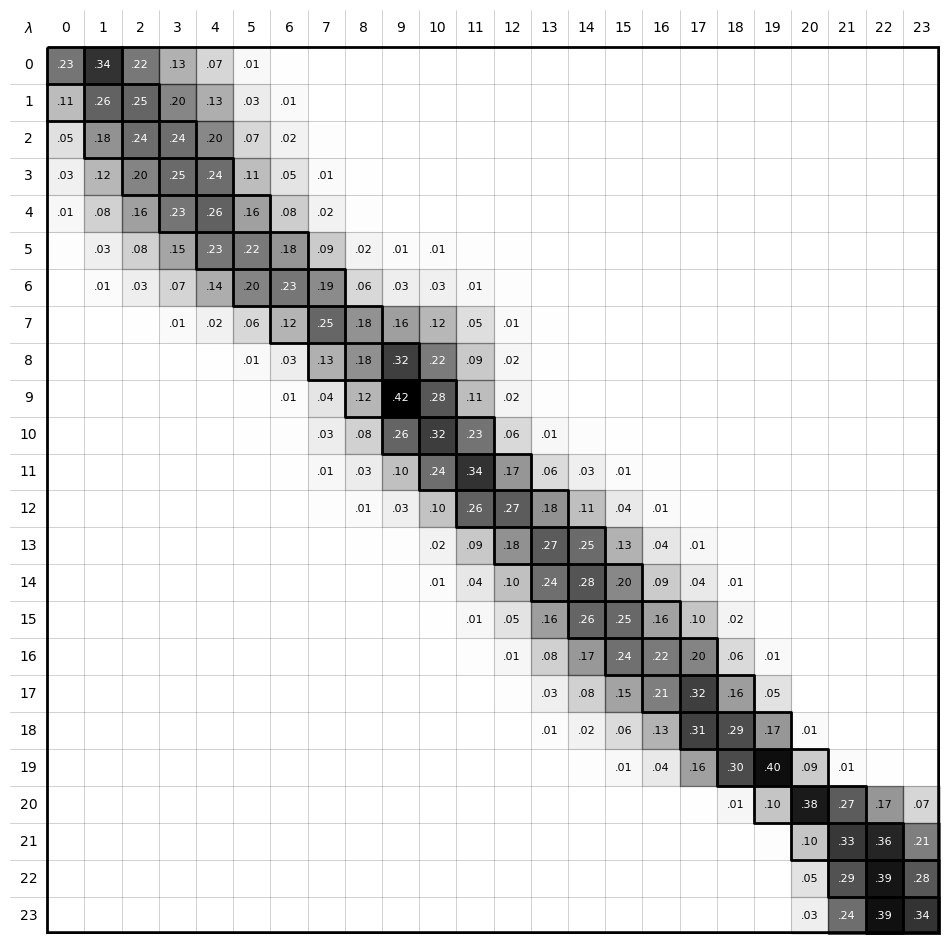

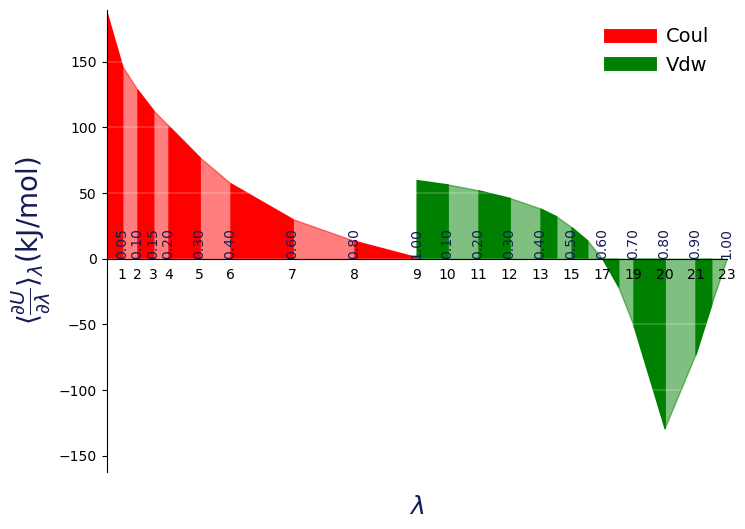

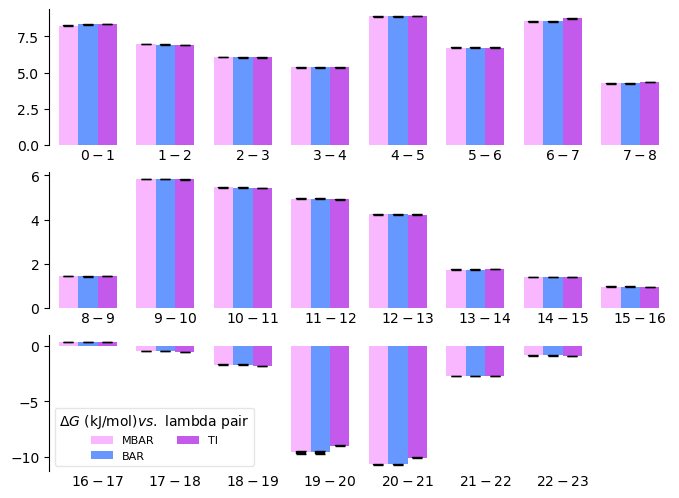

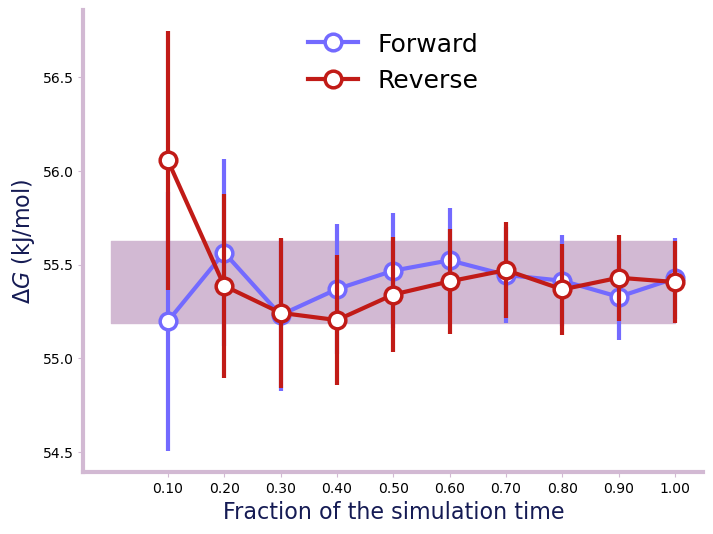

In [2]:
from alchemlyb.workflows import ABFE
import os
sys = '9'
dir = '/Users/estebancea/Library/CloudStorage/OneDrive-Personal/Doctorado/00_Trabajo/20_SAC/12_free_energy/MD/' + sys + '/xvg_files'
# Load the data
workflow = ABFE(software='GROMACS', dir=dir,
                 prefix='prd', suffix='xvg', T=303.2, outdirectory='./')
# Set the unit.
workflow.update_units('kJ/mol')
# Read the data
workflow.read()
# Decorrelate the data.
workflow.preprocess(skiptime=10000, uncorr='dhdl', threshold=50)
# Run the estimator
workflow.estimate(estimators=("MBAR", "BAR", "TI"))
# Retrieve the result
summary = workflow.generate_result()
# Plot the overlap matrix
workflow.plot_overlap_matrix(overlap='O_MBAR_' + sys + '.pdf')
# Plot the dHdl for TI
workflow.plot_ti_dhdl(dhdl_TI='dhdl_TI_' + sys + '.pdf')
# Plot the dF states
workflow.plot_dF_state(dF_state='dF_state_' + sys + '.pdf')
# Convergence analysis
workflow.check_convergence(10, dF_t='dF_t_' + sys + '.pdf')